In [4]:
import pandas as pd
import csv
import math 

In [5]:
f = pd.read_csv("drive/My Drive/ProcessedData.csv")
f_df = f.loc[f['ArrDel15'] == 1]

In [6]:
from sklearn.preprocessing import LabelEncoder
feature_cols = ['DepDelayMinutes','CRSArrTime','ArrDel15','CRSDepTime','DepDel15','windspeedKmph_y','winddirDegree_y', 'weatherCode_y',	'precipMM_y',	'visibility_y',	'pressure_y',	'cloudcover_y',	'DewPointF_y',	'WindGustKmph_y',	'tempF_y',	'WindChillF_y',	'humidity_y', 'airport_y']
X = f_df[feature_cols].copy(deep=True)
y = f_df['ArrDelayMinutes'].copy(deep=True)
le = LabelEncoder()
X['airport_y']=le.fit_transform(X['airport_y'])

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
X_test1 = X_test

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
type(X_test)

numpy.ndarray

Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear= model.predict(X_test)

In [9]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_pred_linear)
mse = metrics.mean_squared_error(y_test, y_pred_linear)
rmse = math.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred_linear)
print("MAE : ",mae)
print("MSE : ",mse)
print("RMSE : ",rmse)
print("R2 : ",r2)

MAE :  12.183647335931111
MSE :  308.237401163738
RMSE :  17.556691065338537
R2 :  0.9422915261881373


In [ ]:
new_df = pd.concat([X_test1,y_test], axis =1)
l = [0, 100, 200, 1000, 2000]
for i in range(len(l)-1):
  new_df1 = new_df.loc[(new_df.ArrDelayMinutes < l[i+1]) & (new_df.ArrDelayMinutes > l[i])]
  y_pred = model.predict(new_df1[new_df1.columns[:-1]])
  print(" " + str(l[i]) + " - " + str(l[i+1]) + " : " + " mae : " + str(metrics.mean_absolute_error(new_df1["ArrDelayMinutes"], y_pred)) )
  print(" " + str(l[i]) + " - " + str(l[i+1]) + " : " + " mse : " + str(metrics.mean_squared_error(new_df1["ArrDelayMinutes"], y_pred)) )
  print(" " + str(l[i]) + " - " + str(l[i+1]) + " : " + " rmse : " + str(math.sqrt(metrics.mean_squared_error(new_df1["ArrDelayMinutes"], y_pred))))
  print(" " + str(l[i]) + " - " + str(l[i+1]) + " : " + " r2 : " + str(metrics.r2_score(new_df1["ArrDelayMinutes"], y_pred)) )
  

 0 - 100 :  mae : 10.955299678983028
 0 - 100 :  mse : 212.4532790864552
 0 - 100 :  rmse : 14.575777134906229
 0 - 100 :  r2 : 0.5612528630601427
 100 - 200 :  mae : 17.94123327574712
 100 - 200 :  mse : 741.4164173003429
 100 - 200 :  rmse : 27.22896283923321
 100 - 200 :  r2 : -0.02366444927766098
 200 - 1000 :  mae : 19.215872490539397
 200 - 1000 :  mse : 918.4111592687359
 200 - 1000 :  rmse : 30.305299194509463
 200 - 1000 :  r2 : 0.9497543190269665
 1000 - 2000 :  mae : 34.30148509954535
 1000 - 2000 :  mse : 1774.3333789452004
 1000 - 2000 :  rmse : 42.122836786536595
 1000 - 2000 :  r2 : 0.9519885228547333


(0.0, 200.0)

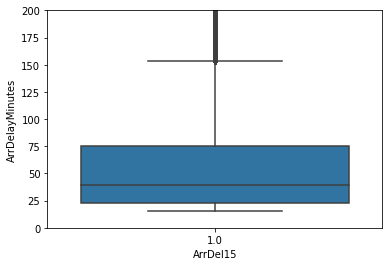

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x=X["ArrDel15"], y=y)
ax.set_ylim(0,200)

Extra Tree Regressor

In [10]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred_extra= reg.predict(X_test)

In [11]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_pred_extra)
mse = metrics.mean_squared_error(y_test, y_pred_extra)
rmse = math.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred_extra)
print("MAE : ",mae)
print("MSE : ",mse)
print("RMSE : ",rmse)
print("R2 : ",r2)

MAE :  11.940691884600565
MSE :  288.7639453786428
RMSE :  16.993055798726807
R2 :  0.9459373634841884


XG Boost Regressor

In [12]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(colsample_bytree = 0.3, learning_rate = 0.5, max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
y_pred_xg = xg_reg.predict(X_test)

[11:08:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [13]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_pred_xg)
mse = metrics.mean_squared_error(y_test, y_pred_xg)
rmse = math.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred_xg)
print("MAE : ",mae)
print("MSE : ",mse)
print("RMSE : ",rmse)
print("R2 : ",r2)

MAE :  11.873858099726434
MSE :  292.2820445231412
RMSE :  17.09625820240035
R2 :  0.9452787019084636


Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor() 
regressor.fit(X_train, y_train)
y_pred_reg = regressor.predict(X_test)

In [11]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_pred_reg)
mse = metrics.mean_squared_error(y_test, y_pred_reg)
rmse = math.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred_reg)
print("MAE : ",mae)
print("MSE : ",mse)
print("RMSE : ",rmse)
print("R2 : ",r2)

MAE :  11.746141215493376
MSE :  278.5831623856832
RMSE :  16.690810716849054
R2 :  0.9478434185135759


In [12]:
new_df = pd.concat([X_test1,y_test], axis =1)
l = [0, 100, 200, 1000, 2000]
for i in range(len(l)-1):
  new_df1 = new_df.loc[(new_df.ArrDelayMinutes < l[i+1]) & (new_df.ArrDelayMinutes > l[i])]
  y_pred = regressor.predict(new_df1[new_df1.columns[:-1]])
  print(" " + str(l[i]) + " - " + str(l[i+1]) + " : " + " mae : " + str(metrics.mean_absolute_error(new_df1["ArrDelayMinutes"], y_pred)) )
  print(" " + str(l[i]) + " - " + str(l[i+1]) + " : " + " mse : " + str(metrics.mean_squared_error(new_df1["ArrDelayMinutes"], y_pred)) )
  print(" " + str(l[i]) + " - " + str(l[i+1]) + " : " + " rmse : " + str(math.sqrt(metrics.mean_squared_error(new_df1["ArrDelayMinutes"], y_pred))))
  print(" " + str(l[i]) + " - " + str(l[i+1]) + " : " + " r2 : " + str(metrics.r2_score(new_df1["ArrDelayMinutes"], y_pred)) )

 0 - 100 :  mae : 1390.3760827814351
 0 - 100 :  mse : 2438928.3895865898
 0 - 100 :  rmse : 1561.7068833768358
 0 - 100 :  r2 : -5035.744326723244
 100 - 200 :  mae : 1764.522877838847
 100 - 200 :  mse : 3148779.9075253406
 100 - 200 :  rmse : 1774.480179524511
 100 - 200 :  r2 : -4346.481354230327
 200 - 1000 :  mae : 1615.0373632343947
 200 - 1000 :  mse : 2628821.3419141183
 200 - 1000 :  rmse : 1621.3640374432011
 200 - 1000 :  r2 : -142.8211166620514
 1000 - 2000 :  mae : 744.2614285714286
 1000 - 2000 :  mse : 586610.6815571429
 1000 - 2000 :  rmse : 765.9051387457476
 1000 - 2000 :  r2 : -14.873029085150254
